<a href="https://colab.research.google.com/github/MQ-COMP2200-COMP6200/portfolio-part-1-HemaChikkaswamy/blob/main/48366528%20Portfolio-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [33]:
your_name = "Hema Chikkaswamy"
your_student_id = "48366528"

In [34]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

In [35]:
original = pd.read_csv("car_sell.csv")

 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [36]:
#1. displaying the DataFrame
original.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [37]:
#2. display the shape for the dataframe
print(original.shape)

#2. display with len
len(original)

original

(4340, 9)


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014.0,409999,80000,Diesel,Individual,Manual,Second Owner
4336,4336,Hyundai i20 Magna 1.4 CRDi,2014.0,409999,80000,Diesel,Individual,Manual,Second Owner
4337,4337,Maruti 800 AC BSIII,2009.0,110000,83000,Petrol,Individual,Manual,Second Owner
4338,4338,Hyundai Creta 1.6 CRDi SX Option,2016.0,865000,90000,Diesel,Individual,Manual,First Owner


In [38]:
#3. presenting the number of null value for each coloumn
original.isnull().sum()

,0
Unnamed: 0,0
name,0
year,310
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [39]:
# 4. remove the rows with missing year
year_clean = original.dropna()

In [40]:
# 5. remove the rows with fuel as 'none'
clean =year_clean.drop(
    year_clean.index[
        year_clean["fuel"] == 'none'
    ]
)

## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [41]:
# 2.1 unique values

# name
name_list = clean['name'].unique()
len(name_list)

# seller type
unique_seller_type_count = clean['seller_type'].nunique()

# transmission
unique_transmission_count = clean['transmission'].nunique()

# owner
unique_owner_count = clean['owner'].nunique()

print(len(name_list))
print(f"Unique Seller Types: {unique_seller_type_count}")
print(f"Unique Transmissions: {unique_transmission_count}")
print(f"Unique Owners: {unique_owner_count}")

1402
Unique Seller Types: 3
Unique Transmissions: 2
Unique Owners: 5


In [42]:
# Q2.2: Descriptive statistics for 'km_driven'
km_driven_stats = clean['km_driven'].describe()

print(km_driven_stats)

count      3886.000000
mean      66313.279207
std       46679.603916
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64


In [44]:
# Q2.3: Describe() of the number of 'selling_price' grouped by 'seller_type'

seller_group = clean.groupby(['seller_type'])

price_num = seller_group['selling_price'].count().reset_index(name='nuber of selling price')

price_num.describe()

,nuber of selling price
count,3.000000
mean,1295.333333
std,1447.912405
min,94.000000
25%,491.500000
50%,889.000000
75%,1896.000000
max,2903.000000


In [46]:
# Q2.4: Describe() of the number of years sold by each 'owner' type

owner_group = clean.groupby(['owner'])

price_num = seller_group['year'].count().reset_index(name='nunber of years')

price_num.describe()

,nunber of years
count,3.000000
mean,1295.333333
std,1447.912405
min,94.000000
25%,491.500000
50%,889.000000
75%,1896.000000
max,2903.000000


## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'CNG'),
  Text(2, 0, 'Diesel'),
  Text(3, 0, 'Electric'),
  Text(4, 0, 'LPG'),
  Text(5, 0, 'Petrol')])

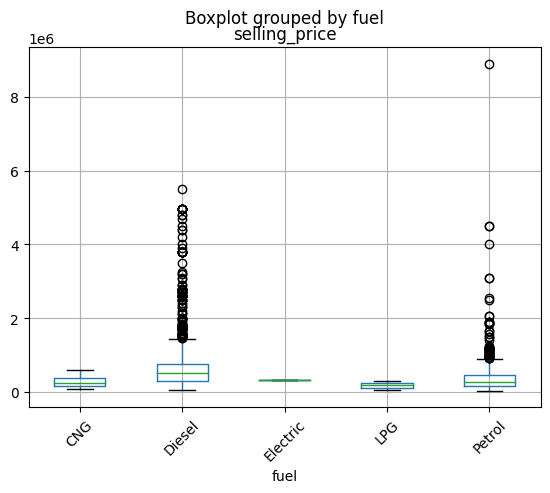

In [ ]:
# fuel vs selling_price
clean.boxplot('selling_price', by='fuel')
plt.xticks(rotation=45)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(1, 0, '1992.0'),
  Text(2, 0, '1995.0'),
  Text(3, 0, '1996.0'),
  Text(4, 0, '1997.0'),
  Text(5, 0, '1998.0'),
  Text(6, 0, '1999.0'),
  Text(7, 0, '2000.0'),
  Text(8, 0, '2001.0'),
  Text(9, 0, '2002.0'),
  Text(10, 0, '2003.0'),
  Text(11, 0, '2004.0'),
  Text(12, 0, '2005.0'),
  Text(13, 0, '2006.0'),
  Text(14, 0, '2007.0'),
  Text(15, 0, '2008.0'),
  Text(16, 0, '2009.0'),
  Text(17, 0, '2010.0'),
  Text(18, 0, '2011.0'),
  Text(19, 0, '2012.0'),
  Text(20, 0, '2013.0'),
  Text(21, 0, '2014.0'),
  Text(22, 0, '2015.0'),
  Text(23, 0, '2016.0'),
  Text(24, 0, '2017.0'),
  Text(25, 0, '2018.0'),
  Text(26, 0, '2019.0'),
  Text(27, 0, '2020.0')])

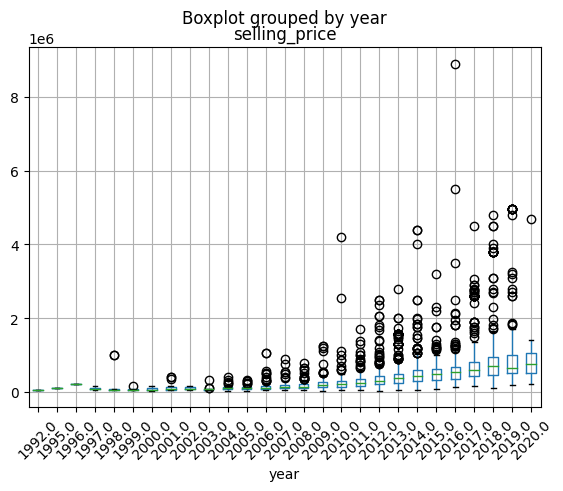

In [ ]:
# year vs selling_price
clean.boxplot('selling_price', by='year')
plt.xticks(rotation=45)

(array([1, 2, 3]),
 [Text(1, 0, 'Dealer'),
  Text(2, 0, 'Individual'),
  Text(3, 0, 'Trustmark Dealer')])

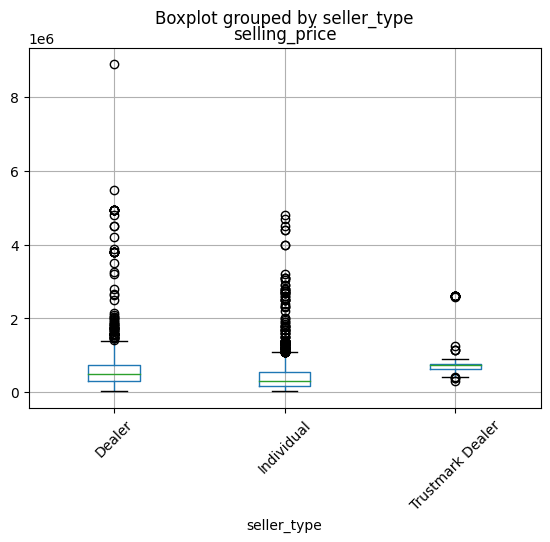

In [ ]:
# selling_type vs seller_price
clean.boxplot('selling_price', by='seller_type')
plt.xticks(rotation=45)

(array([1, 2]), [Text(1, 0, 'Automatic'), Text(2, 0, 'Manual')])

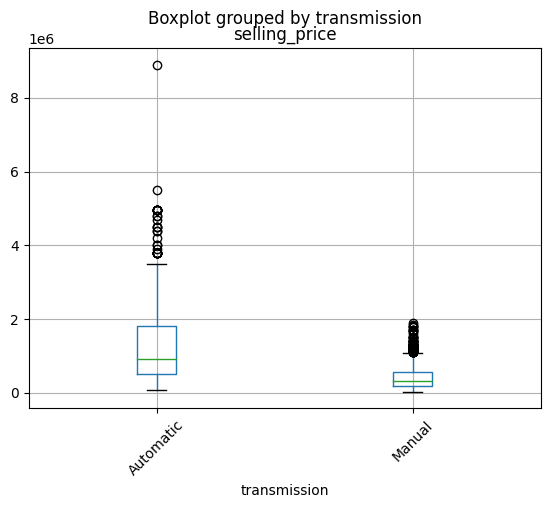

In [ ]:
# transmission vs selling_price
clean.boxplot('selling_price', by='transmission')
plt.xticks(rotation=45)

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'First Owner'),
  Text(2, 0, 'Fourth & Above Owner'),
  Text(3, 0, 'Second Owner'),
  Text(4, 0, 'Test Drive Car'),
  Text(5, 0, 'Third Owner')])

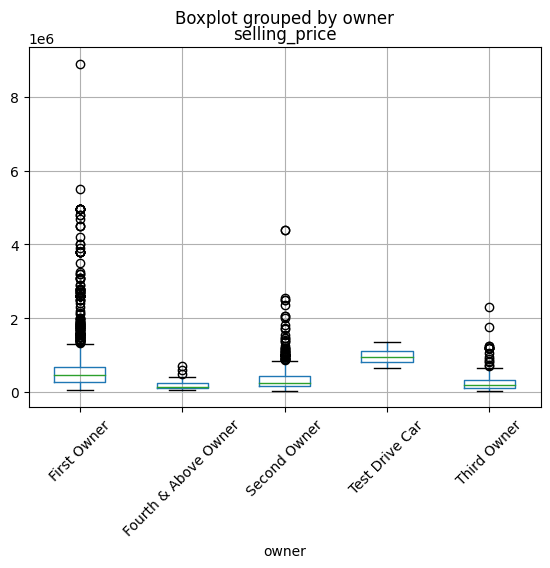

In [ ]:
# owner vs selling_price
clean.boxplot('selling_price', by='owner')
plt.xticks(rotation=45)

## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [ ]:
# Define conditions to filter the data
conditions = (
    (clean['owner'].isin(['First Owner', 'Second Owner', 'Third Owner'])) &
    (clean['fuel'].isin(['Diesel', 'Petrol'])) &
    (clean['seller_type'].isin(['Dealer', 'Individual']))
)

# Apply the conditions to filter the dataset
filtered_data_no_outliers = clean[conditions]

# Record the final length of the dataset after removing outliers
final_length_no_outliers = len(filtered_data_no_outliers)

# Display the length of the filtered data
print(f"Length of the data after removing outliers: {final_length_no_outliers}")


Length of the data after removing outliers: 3657
